## 1-DataSet

In [1]:
# !pip install tsplib95

In [2]:
import tsplib95
import pandas as pd
import matplotlib.pyplot as plt

import glob, os

import numpy as np
from itertools import chain
from scipy.spatial.distance import squareform, pdist
from functools import partial
import math

import random

In [3]:
problem = tsplib95.load('data/a280.tsp')
opt = tsplib95.load('data/a280.opt.tour')

In [4]:
nodes = pd.DataFrame.from_dict(problem.node_coords, orient='index', columns=['x', 'y']).reindex(opt.tours[0])
nodes.head()

,x,y
1,288,149
2,288,129
242,288,109
243,280,109
244,276,101


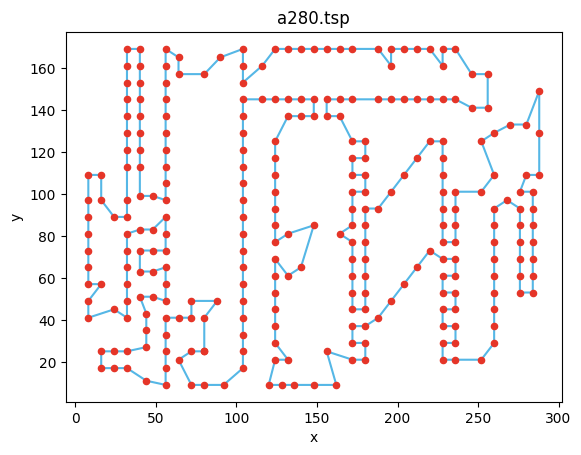

In [5]:
ax1 = nodes.plot.scatter(x='x', y='y', color='#E53528', zorder=2)
ax2 = nodes.plot.line(x='x', y='y',color='#55B7E6', legend=None, zorder=1, ax=ax1)
ax3 = plt.plot([nodes.iloc[-1].x, nodes.iloc[0].x], [nodes.iloc[-1].y, nodes.iloc[0].y], color='#55B7E6', zorder=1)

plt.title('a280.tsp')
plt.show()

In [6]:
edge_weight_type = []
edge_weight_format = []

for file in glob.glob("./data/*.tsp"):
    problem = tsplib95.load(file)
    if problem.edge_weight_type == 'EXPLICIT':
        edge_weight_format.append(problem.edge_weight_format)
    else:
        edge_weight_type.append(problem.edge_weight_type)

edge_weight_type = list(set(edge_weight_type))
edge_weight_format = list(set(edge_weight_format))

print(edge_weight_type)
print(edge_weight_format)

['EUC_2D', 'GEO', 'ATT', 'CEIL_2D']
['UPPER_DIAG_ROW', 'FULL_MATRIX', 'UPPER_ROW', 'LOWER_DIAG_ROW']


In [7]:
def get_distance_matrix(file_path='data/a280.tsp'):
    problem = tsplib95.load(file_path)
    
    if problem.edge_weight_type == 'EXPLICIT':
        if problem.edge_weight_format == 'FULL_MATRIX':
            distance_matrix = problem.edge_weights
        else:
            num_nodes = problem.dimension
            
            if problem.edge_weight_format == 'LOWER_DIAG_ROW':
                idx = np.tril_indices(num_nodes)
            if problem.edge_weight_format == 'UPPER_ROW':
                idx = np.triu_indices(num_nodes, k=1)
            if problem.edge_weight_format == 'UPPER_DIAG_ROW':
                idx = np.triu_indices(num_nodes)

            distance = list(chain(*problem.edge_weights))
            distance_matrix = np.zeros((num_nodes,num_nodes))
            distance_matrix[idx] = distance
            distance_matrix[idx[1], idx[0]] = distance
    else:
        nodes = pd.DataFrame.from_dict(problem.node_coords, orient='index', columns=['x', 'y']).reindex(opt.tours[0])
        
        if problem.edge_weight_type == 'EUC_2D':
            distance_matrix = squareform(pdist(nodes, tsplib95.distances.euclidean))
        if problem.edge_weight_type == 'CEIL_2D':
            distance_matrix = squareform(pdist(nodes, partial(tsplib95.distances.euclidean, round=math.ceil)))
        if problem.edge_weight_type == 'GEO':
            distance_matrix = squareform(pdist(nodes, tsplib95.distances.geographical))
        if problem.edge_weight_type == 'ATT':
            distance_matrix = squareform(pdist(nodes, tsplib95.distances.pseudo_euclidean))
    
    return pd.DataFrame(distance_matrix)

In [8]:
distance_matrix = get_distance_matrix('data/a280.tsp')
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0.0,20.0,40.0,41.0,49.0,48.0,56.0,64.0,72.0,80.0,...,89.0,82.0,76.0,71.0,60.0,49.0,43.0,34.0,24.0,18.0
1,20.0,0.0,20.0,22.0,30.0,28.0,36.0,44.0,52.0,60.0,...,74.0,68.0,63.0,59.0,46.0,34.0,36.0,28.0,18.0,9.0
2,40.0,20.0,0.0,8.0,14.0,9.0,16.0,24.0,32.0,40.0,...,61.0,57.0,54.0,53.0,37.0,28.0,39.0,34.0,30.0,25.0
3,41.0,22.0,8.0,0.0,9.0,9.0,16.0,24.0,32.0,40.0,...,54.0,50.0,47.0,45.0,29.0,20.0,32.0,28.0,26.0,24.0
4,49.0,30.0,14.0,9.0,0.0,8.0,11.0,18.0,25.0,33.0,...,47.0,43.0,41.0,40.0,24.0,18.0,34.0,32.0,33.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,49.0,34.0,28.0,20.0,18.0,25.0,29.0,34.0,40.0,47.0,...,40.0,34.0,29.0,25.0,11.0,0.0,18.0,20.0,26.0,31.0
276,43.0,36.0,39.0,32.0,34.0,40.0,45.0,51.0,58.0,64.0,...,51.0,43.0,36.0,29.0,24.0,18.0,0.0,9.0,20.0,29.0
277,34.0,28.0,34.0,28.0,32.0,37.0,43.0,50.0,57.0,65.0,...,57.0,50.0,43.0,37.0,29.0,20.0,9.0,0.0,11.0,20.0
278,24.0,18.0,30.0,26.0,33.0,35.0,42.0,50.0,58.0,66.0,...,66.0,59.0,52.0,47.0,37.0,26.0,20.0,11.0,0.0,10.0


In [9]:
random.seed(0)
dataset_path = random.sample(glob.glob("./data/*.tsp"), k=5)

dataset = {}
for path in dataset_path:
    print(path)
    dataset[os.path.basename(path)] = get_distance_matrix(path)

./data/vm1748.tsp
./data/dantzig42.tsp
./data/pla33810.tsp
./data/d1291.tsp
./data/rl5934.tsp


## 2-LLM

In [10]:
# !pip install absl-py

In [11]:
import time
import json
import multiprocessing
from typing import Collection, Any
import http.client
from implementation import sampler

In [12]:
api_key = 'sk-0ivLxCmk7HNR86iH81Aa4dC92aA34439AbE5F857BeC1F433'

In [13]:
def _trim_preface_of_body(sample: str) -> str:
    """Trim the redundant descriptions/symbols/'def' declaration before the function body.
    Please see my comments in sampler.LLM (in sampler.py).
    Since the LLM used in this file is not a pure code completion LLM, this trim function is required.

    -Example sample (function & description generated by LLM):
    -------------------------------------
    This is the optimized function ...
    def priority_v2(...) -> ...:
        return ...
    This function aims to ...
    -------------------------------------
    -This function removes the description above the function's signature, and the function's signature.
    -The indent of the code is preserved.
    -Return of this function:
    -------------------------------------
        return ...
    This function aims to ...
    -------------------------------------
    """
    lines = sample.splitlines()
    func_body_lineno = 0
    find_def_declaration = False
    for lineno, line in enumerate(lines):
        # find the first 'def' statement in the given code
        if line[:3] == 'def':
            func_body_lineno = lineno
            find_def_declaration = True
            break
    if find_def_declaration:
        code = ''
        for line in lines[func_body_lineno + 1:]:
            code += line + '\n'
        return code
    return sample

class LLMAPI(sampler.LLM):
    """Language model that predicts continuation of provided source code.
    """

    def __init__(self, samples_per_prompt: int, trim=True):
        super().__init__(samples_per_prompt)
        additional_prompt = ('Complete a different and more complex Python function. '
                             'Be creative and you can insert multiple if-else and for-loop in the code logic.'
                             'Only output the Python code, no descriptions.')
        self._additional_prompt = additional_prompt
        self._trim = trim

    def draw_samples(self, prompt: str) -> Collection[str]:
        """Returns multiple predicted continuations of `prompt`."""
        return [self._draw_sample(prompt) for _ in range(self._samples_per_prompt)]

    def _draw_sample(self, content: str) -> str:
        prompt = '\n'.join([content, self._additional_prompt])
        while True:
            try:
                conn = http.client.HTTPSConnection("api.chatanywhere.com.cn")
                payload = json.dumps({
                    "max_tokens": 512,
                    "model": "gpt-3.5-turbo",
                    "messages": [
                        {
                            "role": "user",
                            "content": prompt
                        }
                    ]
                })
                headers = {
                    'Authorization': 'Bearer {api_key}'.format(api_key=api_key),
                    'User-Agent': 'Apifox/1.0.0 (https://apifox.com)',
                    'Content-Type': 'application/json'
                }
                conn.request("POST", "/v1/chat/completions", payload, headers)
                res = conn.getresponse()
                data = res.read().decode("utf-8")
                data = json.loads(data)
                response = data['choices'][0]['message']['content']
                # trim function
                if self._trim:
                    response = _trim_preface_of_body(response)
                return response
            except Exception:
                time.sleep(2)
                continue

## 3-SandBox

In [14]:
from implementation import evaluator
from implementation import evaluator_accelerate

In [15]:
class Sandbox(evaluator.Sandbox):
    """Sandbox for executing generated code. Implemented by RZ.

    RZ: Sandbox returns the 'score' of the program and:
    1) avoids the generated code to be harmful (accessing the internet, take up too much RAM).
    2) stops the execution of the code in time (avoid endless loop).
    """

    def __init__(self, verbose=False, numba_accelerate=True):
        """
        Args:
            verbose         : Print evaluate information.
            numba_accelerate: Use numba to accelerate the evaluation. It should be noted that not all numpy functions
                              support numba acceleration, such as np.piecewise().
        """
        self._verbose = verbose
        self._numba_accelerate = numba_accelerate

    def run(
            self,
            program: str,
            function_to_run: str,  # RZ: refers to the name of the function to run (e.g., 'evaluate')
            function_to_evolve: str,  # RZ: accelerate the code by decorating @numba.jit() on function_to_evolve.
            inputs: Any,  # refers to the dataset
            test_input: str,  # refers to the current instance
            timeout_seconds: int,
            **kwargs  # RZ: add this
    ) -> tuple[Any, bool]:
        """Returns `function_to_run(test_input)` and whether execution succeeded.

        RZ: If the generated code (generated by LLM) is executed successfully,
        the output of this function is the score of a given program.
        RZ: PLEASE NOTE THAT this SandBox is only designed for bin-packing problem.
        """
        dataset = inputs[test_input]
        result_queue = multiprocessing.Queue()
        process = multiprocessing.Process(
            target=self._compile_and_run_function,
            args=(program, function_to_run, function_to_evolve, dataset, self._numba_accelerate, result_queue)
        )
        process.start()
        process.join(timeout=timeout_seconds)
        if process.is_alive():
            # if the process is not finished in time, we consider the program illegal
            process.terminate()
            process.join()
            results = None, False
        else:
            if not result_queue.empty():
                results = result_queue.get_nowait()
            else:
                results = None, False

        if self._verbose:
            print(f'================= Evaluated Program =================')
            program_: code_manipulation.Program = code_manipulation.text_to_program(text=program)
            func_to_evolve_: str = kwargs.get('func_to_evolve', 'priority')
            function_: code_manipulation.Function = program_.get_function(func_to_evolve_)
            function_: str = str(function_).strip('\n')
            print(f'{function_}')
            print(f'-----------------------------------------------------')
            print(f'Score: {str(results)}')
            print(f'=====================================================')
            print(f'\n\n')

        return results

    def _compile_and_run_function(self, program, function_to_run, function_to_evolve, dataset, numba_accelerate,
                                  result_queue):
        try:
            # optimize the code (decorate function_to_run with @numba.jit())
            if numba_accelerate:
                program = evaluator_accelerate.add_numba_decorator(
                    program=program,
                    function_to_evolve=function_to_evolve
                )
            # compile the program, and maps the global func/var/class name to its address
            all_globals_namespace = {}
            # execute the program, map func/var/class to global namespace
            exec(program, all_globals_namespace)
            # get the pointer of 'function_to_run'
            function_to_run = all_globals_namespace[function_to_run]
            # return the execution results
            results = function_to_run(dataset)
            # the results must be int or float
            if not isinstance(results, (int, float)):
                result_queue.put((None, False))
                return
            result_queue.put((results, True))
        except:
            # if raise any exception, we assume the execution failed
            result_queue.put((None, False))

## 4-Specification

In [16]:
def get_next_node(num_nodes, tour, distance_matrix):
    current_node = tour[-1]
    min_distance = float('inf')
    next_node = None
    for node in range(num_nodes):
        if node in tour: continue
        if distance_matrix[current_node][node] < min_distance:
            next_node = node
            min_distance = distance_matrix[current_node][next_node]
    return next_node, min_distance

def tsp(distance_matrix):
    """greedy algorithm"""
    num_nodes = len(distance_matrix)
    current_node = 0
    tour = [current_node]
    total_distance = 0
    
    while(len(tour) < num_nodes):
        next_node, min_distance = get_next_node(num_nodes, tour, distance_matrix)
        total_distance += min_distance
        tour.append(next_node)

    total_distance += distance_matrix[tour[-1]][0]
    tour.append(tour[0])
    return tour, total_distance

# @funsearch.run
def evaluate(distance_matrix):
    tour, total_distance = tsp(distance_matrix)
    return -total_distance

# @funsearch.evolve
def priority(num_nodes, tour, distance_matrix):
    current_node = tour[-1]
    priorities = -distance_matrix[current_node]
    
    for node in range(num_nodes):
        if node in tour: 
            priorities[node] = float('inf')
    
    return priorities

In [17]:
specification = r'''
def get_next_node(num_nodes, tour, distance_matrix):
    current_node = tour[-1]
    min_distance = float('inf')
    next_node = None
    for node in range(num_nodes):
        if node in tour: continue
        if distance_matrix[current_node][node] < min_distance:
            next_node = node
            min_distance = distance_matrix[current_node][next_node]
    return next_node, min_distance

def tsp(distance_matrix):
    """greedy algorithm"""
    num_nodes = len(distance_matrix)
    current_node = 0
    tour = [current_node]
    total_distance = 0
    
    while(len(tour) < num_nodes):
        next_node, min_distance = get_next_node(num_nodes, tour, distance_matrix)
        total_distance += min_distance
        tour.append(next_node)

    total_distance += distance_matrix[tour[-1]][0]
    tour.append(tour[0])
    return tour, total_distance

@funsearch.run
def evaluate(distance_matrix):
    tour, total_distance = tsp(distance_matrix)
    return -total_distance

@funsearch.evolve
def priority(num_nodes, tour, distance_matrix):
    current_node = tour[-1]
    priorities = -distance_matrix[current_node]
    
    for node in range(num_nodes):
        if node in tour: 
            priorities[node] = float('inf')
    
    return priorities
'''

## 5-Main

In [18]:
# !pip install torch
# !pip install tensorboard

In [19]:
from implementation import funsearch
from implementation import config

In [20]:
# It should be noted that the if __name__ == '__main__' is required.
# Because the inner code uses multiprocess evaluation.
if __name__ == '__main__':
    class_config = config.ClassConfig(llm_class=LLMAPI, sandbox_class=Sandbox)
    main_config = config.Config(samples_per_prompt=1, evaluate_timeout_seconds=30)
    global_max_sample_num = 10  # if it is set to None, funsearch will execute an endless loop
    funsearch.main(
        specification=specification,
        inputs=dataset,
        config=main_config,
        max_sample_nums=global_max_sample_num,
        class_config=class_config,
        log_dir='../logs/funsearch_llm_api'
    )

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/coco/anaconda3/envs/tsp/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/coco/anaconda3/envs/tsp/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'Sandbox' on <module '__main__' (built-in)>


KeyboardInterrupt: 